cara install library:
1. buka anaconda prompt
2. klik kanan, pilih "Run as administrator"
3. ketik "conda activate infor"

pakai library face recognition

Coba buat muka manusia, boneka, monyet
kasi pakai algoritma apa
coba yang negro dan org kulit putih foto bareng
coba dr samping

monyet sama orang jadi satu
warna muka sama background mirip (sama sama putih)

coba orang jepang yang dandan sampai muka nya putiihh banget
detect nama orgnya jg, bisa ditraining dgn 1 gambar

dicari tahu apa yang salah

dipisah jadi bbrp blok supaya tahu gagalnya dimana

Number of faces detected: 0


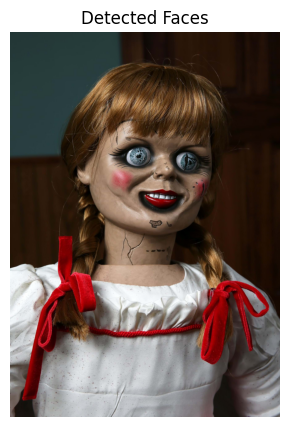

In [10]:
import cv2
import matplotlib.pyplot as plt

def detect_facesas(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the Haar cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=7,  # Increase to reduce false positives
        minSize=(30, 30)  # Keep small to detect smaller faces
    )

    # Filter out small detections
    min_face_size = 100  # Minimum size of what we consider a valid face
    faces = [face for face in faces if face[2] > min_face_size and face[3] > min_face_size]

    # Print the number of faces detected
    print(f"Number of faces detected: {len(faces)}")

    # Draw rectangles around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title('Detected Faces')
    plt.show()

# Input path to the photo
image_path = 'anabel.jpg'  # Replace with the path to your image
detect_faces(image_path)


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import face_recognition

def remove_color_noise(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB (as face_recognition uses RGB format)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect face locations using face_recognition
    face_locations = face_recognition.face_locations(rgb_image)

    # Create a mask for inpainting
    mask = np.zeros(rgb_image.shape[:2], dtype=np.uint8)

    # Create a mask for the faces to exclude them from the noise detection
    for top, right, bottom, left in face_locations:
        cv2.rectangle(mask, (left, top), (right, bottom), 255, thickness=cv2.FILLED)

    # Convert the image to grayscale to detect noise
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect noise using a threshold
    _, noise_mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    # Combine the noise mask with the face mask
    combined_mask = cv2.bitwise_and(noise_mask, noise_mask, mask=cv2.bitwise_not(mask))

    # Optionally, you can clean up the mask using morphological operations
    kernel = np.ones((3, 3), np.uint8)
    combined_mask = cv2.dilate(combined_mask, kernel, iterations=1)
    combined_mask = cv2.erode(combined_mask, kernel, iterations=1)

    # Inpaint the image using the combined mask
    inpainted_image = cv2.inpaint(image, combined_mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    inpainted_image_rgb = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)

    # Plot the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.title('Original Image')
    plt.imshow(image_rgb)
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title('Face Mask')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title('Noise Mask')
    plt.imshow(combined_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title('Inpainted Image')
    plt.imshow(inpainted_image_rgb)
    plt.axis('off')

    plt.show()

# Input path to the photo
image_path = 'face1.jpg'  # Replace with the path to your image
remove_color_noise(image_path)


ModuleNotFoundError: No module named 'face_recognition'